# Libraries

In [1]:
# to handle the data
import pandas as pd
import numpy as np
from scipy import stats

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# to preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# import interative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# pipeline
from sklearn.pipeline import Pipeline

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Read data

In [3]:
df = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges 칼럼은 float 데이터타입인데 object 타입이라고 나와있으므로 변경시켜준다.

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [6]:
df.dropna(inplace = True)

# 분석에 필요없는 칼럼은 삭제
df.drop('customerID', axis = 1, inplace = True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [8]:
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [9]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


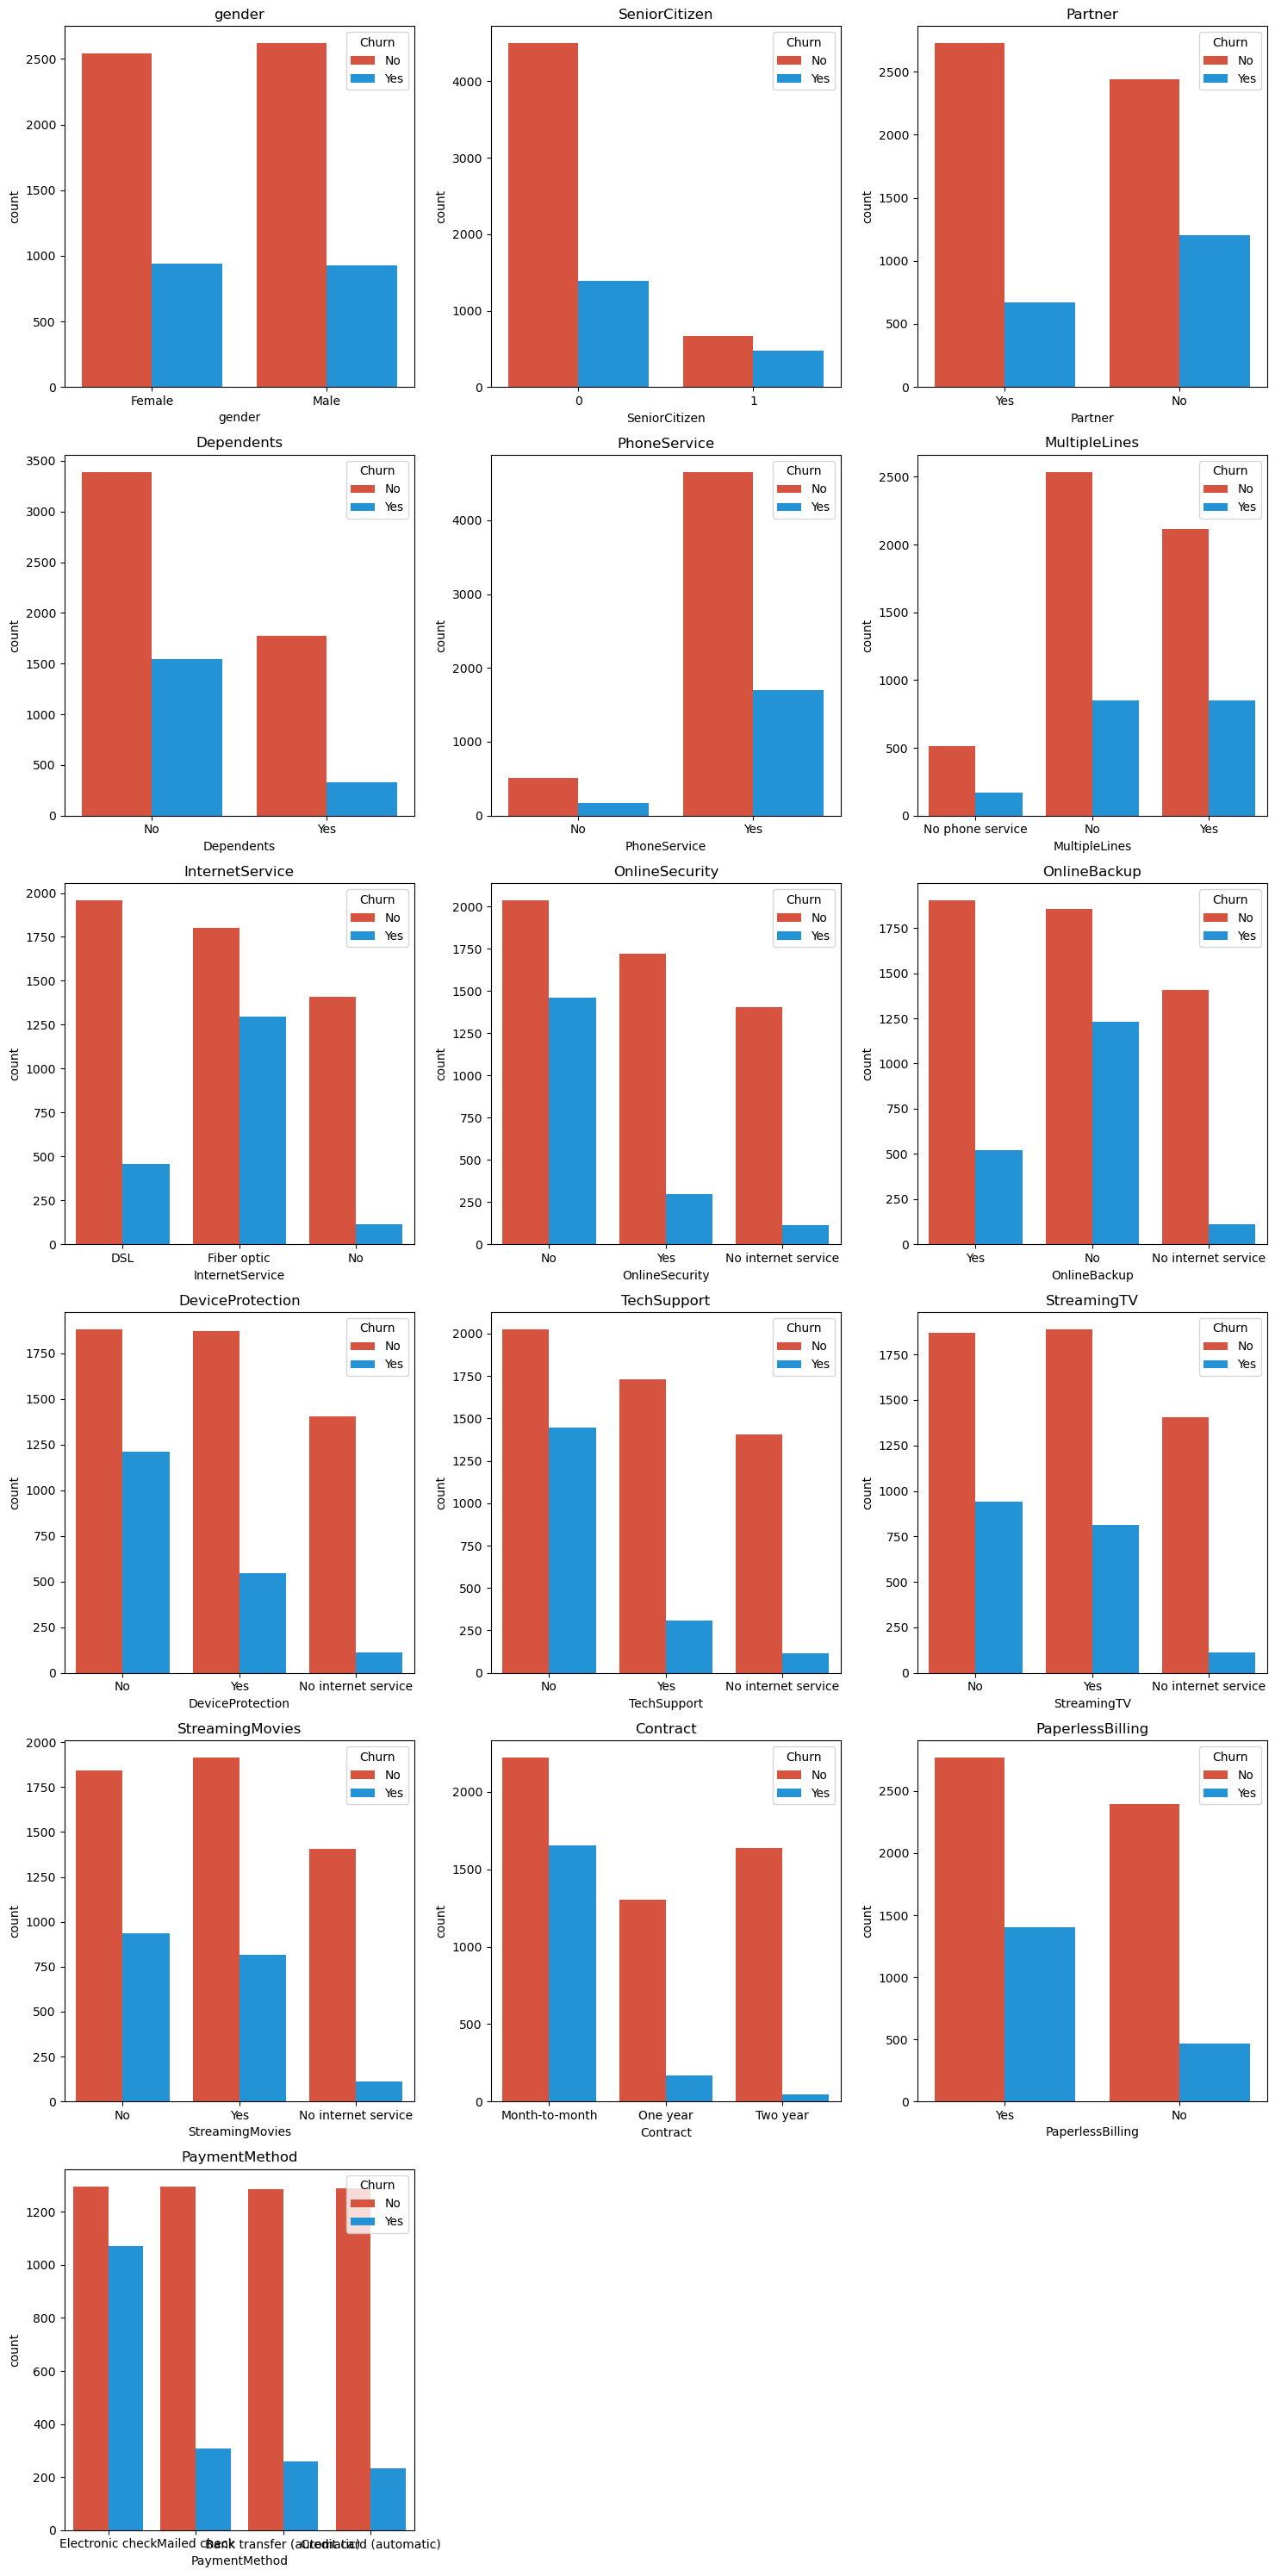

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = {'Yes' :'#069AF3' , 'No' : '#EF4026'}

palette = {0: '#069AF3', 1: '#EF4026'}

# 한 행에 3개씩 배치
n_cols = 3  # 한 행에 그래프 3개
predictors = df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure']).columns
n_rows = (len(predictors) + n_cols - 1) // n_cols  # 필요한 행 수 계산

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # 전체 Figure 생성

# 그래프 그리기
for i, predictor in enumerate(predictors):
    row, col = divmod(i, n_cols)  # 행(row), 열(col) 인덱스 계산
    sns.countplot(data=df, x=predictor, hue='Churn', palette=colors, ax=axes[row, col])
    axes[row, col].set_title(predictor)

# 남은 빈 공간(축) 숨기기
for j in range(len(predictors), n_rows * n_cols):
    row, col = divmod(j, n_cols)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [14]:
# Define colors for Yes and No
# colors = {'Yes' :'#069AF3' , 'No' : '#EF4026'}

# palette = {0: '#069AF3', 1: '#EF4026'}

# for i, predictor in enumerate(df.drop(columns = ['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
#     plt.figure(i, figsize = (5, 3))
#     sns.countplot(data = df, x = predictor, hue = 'Churn', palette = colors)
#     plt.title(predictor)
#     plt.show()

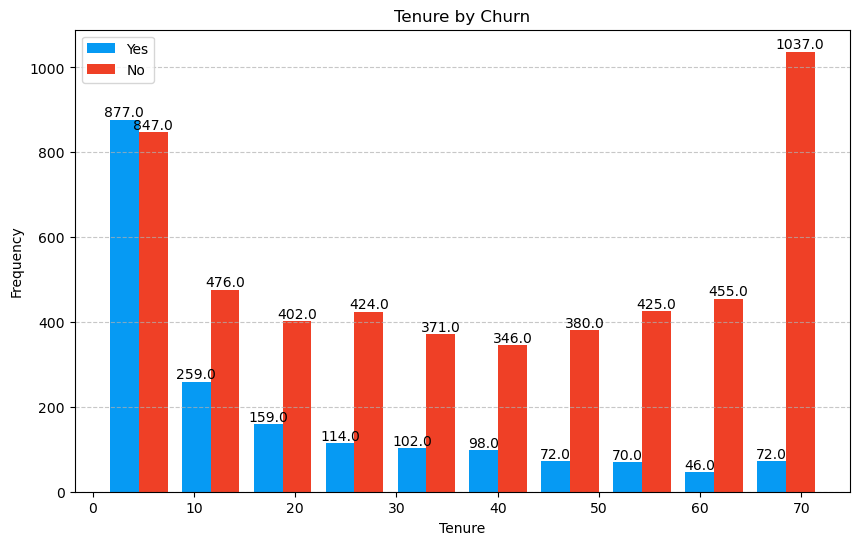

In [10]:
# make plot for tenure
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

plt.figure(figsize = (10, 6))
plt.hist([churned['tenure'], not_churned['tenure']], bins = 10, color= ['#069AF3', '#EF4026'], label = ['Yes', 'No'])
plt.title('Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha = 'center', va = 'bottom')

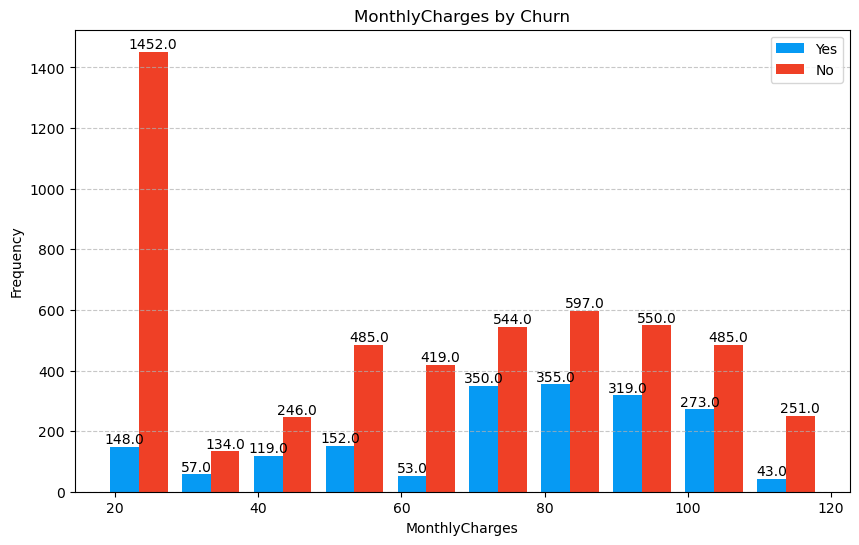

In [11]:
# make plot for MonthlyCharges
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

plt.figure(figsize = (10, 6))
plt.hist([churned['MonthlyCharges'], not_churned['MonthlyCharges']], bins = 10, color = ['#069AF3', '#EF4026'], label = ['Yes', 'No'])
plt.title('MonthlyCharges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

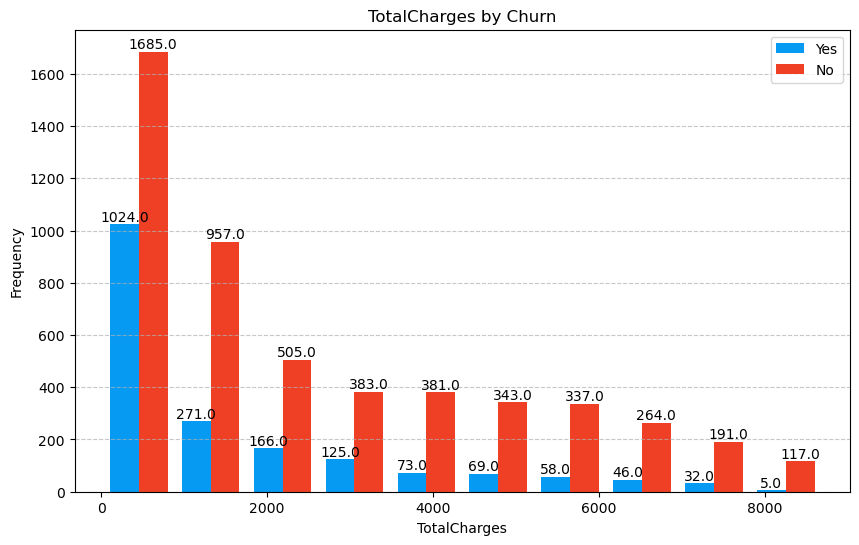

In [12]:
# make plot for TotalCharges
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

plt.figure(figsize = (10, 6))
plt.hist([churned['TotalCharges'], not_churned['TotalCharges']], bins = 10, color = ['#069AF3', '#EF4026'], label = ['Yes', 'No'])
plt.title('TotalCharges by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha = 'center', va= 'bottom')

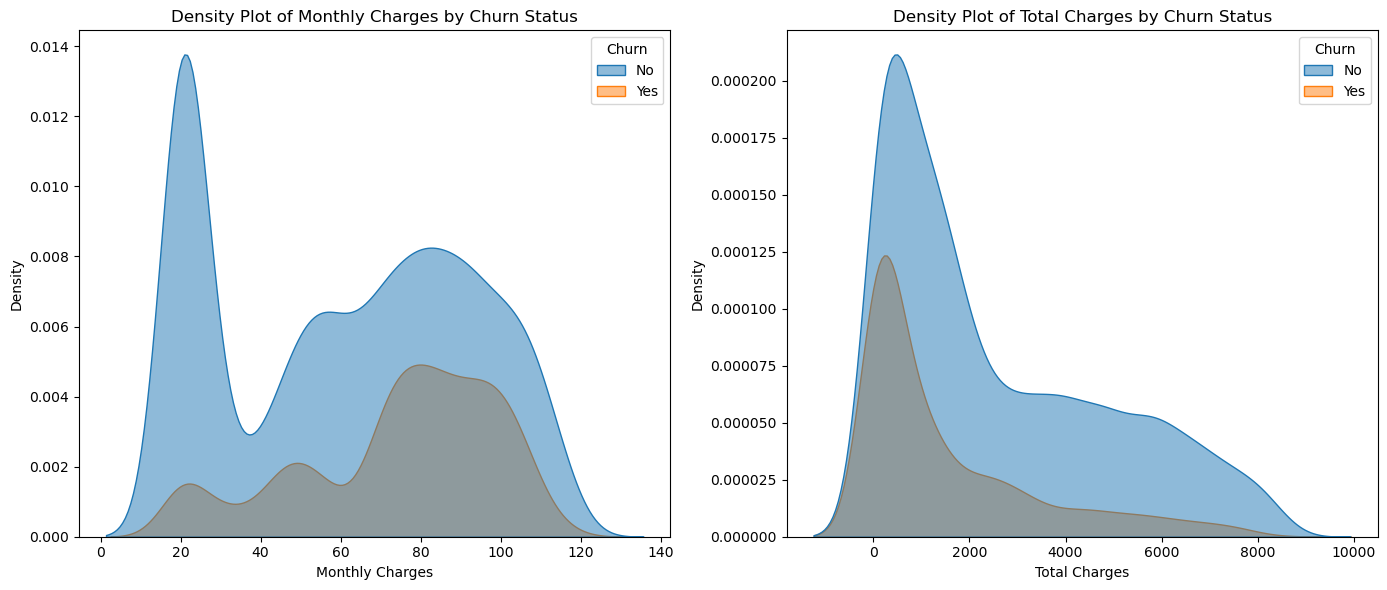

In [13]:
fig, axes = plt.subplots(1, 2, figsize = (14, 6))

sns.kdeplot(data = df, x = 'MonthlyCharges', hue = 'Churn', fill = True, alpha = 0.5, ax = axes[0])
axes[0].set_title('Density Plot of Monthly Charges by Churn Status')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Density')

sns.kdeplot(data = df, x = 'TotalCharges', hue = 'Churn', fill = True, alpha = 0.5, ax=axes[1])
axes[1].set_title('Density Plot of Total Charges by Churn Status')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

월 요금이 낮은 고객보다는 높은 고객이 이탈할 가능성이 더 높다.

총 요금이 중간인 고객이 이탈할 가능성이 높고, 총 요금이 낮거나 높은 경우에 고객이 더 오래 유지되는 경항이 보인다.

# Machine Learning

**Encode the data by OneHotEncoder**

In [14]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include = ['category', 'object']).columns

# Apply OneHotEncoder
encoder = OneHotEncoder(sparse_output = False) # Setting drop = 'first' to avoid multicollinearity
encoded_data = encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the DataFrame
df.drop(columns = categorical_cols, inplace = True)

#Reset index of the DataFrame
df.reset_index(drop = True, inplace = True)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis = 1)

In [15]:
df.drop('Churn_No', axis = 1, inplace = True)

In [16]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [17]:
df.rename(columns = {'Churn_Yes': 'Churn'}, inplace = True)

In [18]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state = 42),
    {'model__n_estimators' : [50, 100, 200],
    'model__max_depth' : [None, 10, 20]}),
    ('Gradient Boosting', GradientBoostingClassifier(random_state = 42),
    {'model__n_estimators' : [50, 100, 200],
    'model__learning_rate' : [0.05, 0.1, 0.5]}),
    ('Support Vector Machine', SVC(random_state = 42, class_weight = 'balanced'),
    {'model__C' : [0.1, 1, 10],
    'model__gamma' : ['scale', 'auto']}),
    ('Logistic Regression', LogisticRegression(random_state = 42, class_weight = 'balanced'),
    {'model__C' : [0.1, 1, 10],
    'model__penalty' : ['l1', 'l2']}),
    ('K-Nearest Neighbors', KNeighborsClassifier(),
    {'model__n_neighbors' : [3, 5, 7],
    'model__weights' : ['uniform', 'distance']}),
    ('Decision Tree', DecisionTreeClassifier(random_state = 42),
    {'model__max_depth' : [None, 10, 20],
    'model__min_samples_split' : [2, 5, 10]}),
    ('Ada Boost', AdaBoostClassifier(random_state = 42),
    {'model__n_estimators' : [50, 100, 200],
    'model__learning_rate' : [0.05, 0.1, 0.5]}),
    ('XG Boost', XGBClassifier(random_state = 42),
    {'model__n_estimators' : [50, 100, 200],
    'model__learning_rate' : [0.05, 0.1, 0.5]}),
    ('Naive Bayes', GaussianNB(), {})
]
     
best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', model)
    ])
    
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv = 2)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_
        
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    model_scores.append({'Model' : name, 'Accuracy' : accuracy})
    
    scores_df = pd.DataFrame(model_scores)
    
    print("Model:", name)
    print("Test Accuracy:", round(accuracy, 3), '%')
    print()
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline
        
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", round(best_accuracy, 2), "%")

Model: Random Forest
Test Accuracy: 0.803 %

Model: Gradient Boosting
Test Accuracy: 0.803 %

Model: Support Vector Machine
Test Accuracy: 0.752 %

Model: Logistic Regression
Test Accuracy: 0.75 %

Model: K-Nearest Neighbors
Test Accuracy: 0.761 %

Model: Decision Tree
Test Accuracy: 0.772 %

Model: Ada Boost
Test Accuracy: 0.798 %

Model: XG Boost
Test Accuracy: 0.799 %

Model: Naive Bayes
Test Accuracy: 0.707 %

Best Model:
Test Accuracy: 0.8031272210376688
Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=10, n_estimators=50,
                                        random_state=42))]) with accuracy 0.8 %


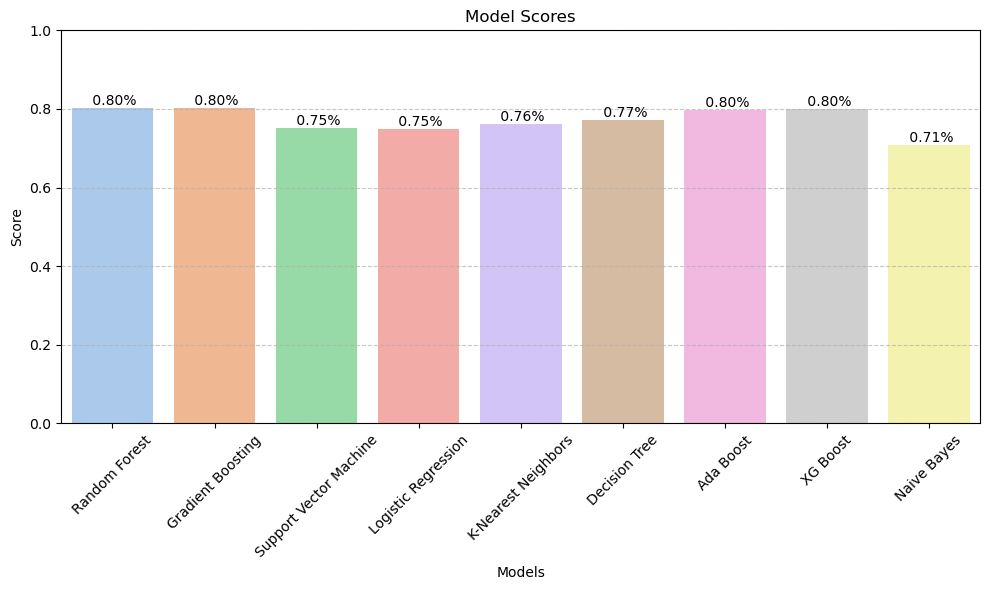

In [20]:
colors = sns.color_palette('pastel', n_colors = len(scores_df))

plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'Model', y = 'Accuracy', data = scores_df, palette = colors)

for p in ax.patches:
    ax.annotate(f'{p.get_height() : .2f}%',
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', fontsize = 10, color = 'black', xytext = (0, 5),
               textcoords = 'offset points')
    
plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.ylim(0, 1)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

In [21]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [26]:
# UpSampling
sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)

# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'max_depth': randint(3, 6), 
         'learning_rate': uniform(0.01, 0.2),  
         'n_estimators': randint(100, 300),  
         'subsample': uniform(0.8, 0.2)}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using RandomizedSearchCV for XG Boost
    if name == 'XG Boost':
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                           n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=-1)
        random_search.fit(Xr_train, yr_train)
        pipeline = random_search.best_estimator_
    # Hyperparameter tuning using GridSearchCV for other models
    elif param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=2, verbose=0)
        grid_search.fit(Xr_train, yr_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(Xr_train, yr_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(Xr_test)

    # Calculate accuracy score
    accuracy = accuracy_score(yr_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", round(accuracy, 3),"%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", round(best_accuracy, 2), "%")

Model: Random Forest
Test Accuracy: 0.953 %

Model: Gradient Boosting
Test Accuracy: 0.951 %

Model: Support Vector Machine
Test Accuracy: 0.979 %

Model: Logistic Regression
Test Accuracy: 0.908 %

Model: K-Nearest Neighbors
Test Accuracy: 0.986 %

Model: Decision Tree
Test Accuracy: 0.925 %

Model: Ada Boost
Test Accuracy: 0.942 %

Model: XG Boost
Test Accuracy: 0.951 %

Model: Naive Bayes
Test Accuracy: 0.887 %

Best Model:
Test Accuracy: 0.9863013698630136
Model Pipeline: KNeighborsClassifier(n_neighbors=3, weights='distance') with accuracy 0.99 %


In [23]:
print(X.shape)
print(y.shape)

(7032, 45)
(7032,)


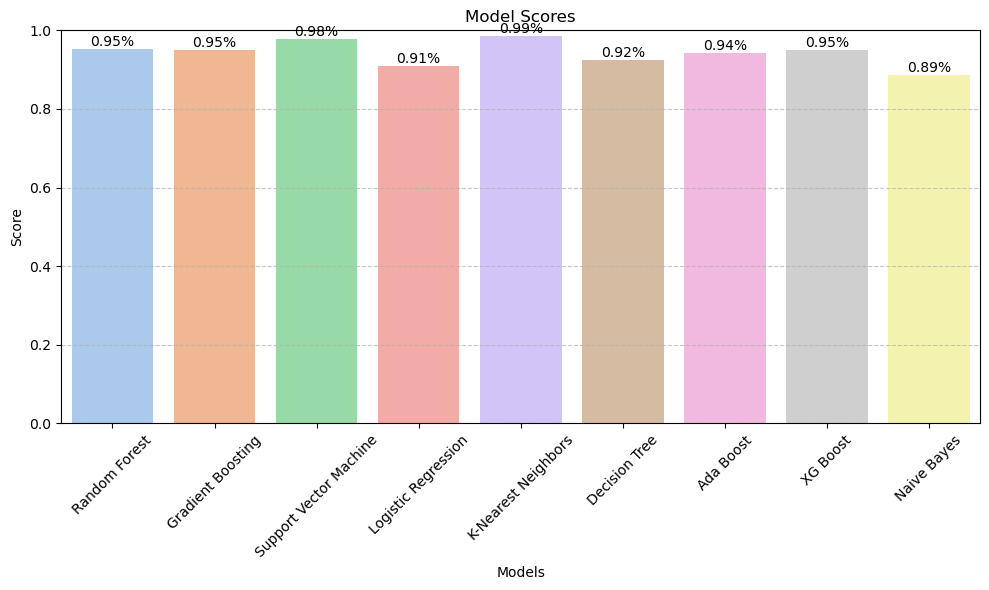

In [27]:
colors = sns.color_palette('pastel', n_colors = len(scores_df))

plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'Model', y = 'Accuracy', data = scores_df, palette = colors)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', fontsize = 10, color = 'black',
               xytext = (0, 5), textcoords = 'offset points')
    
plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.ylim(0, 1)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

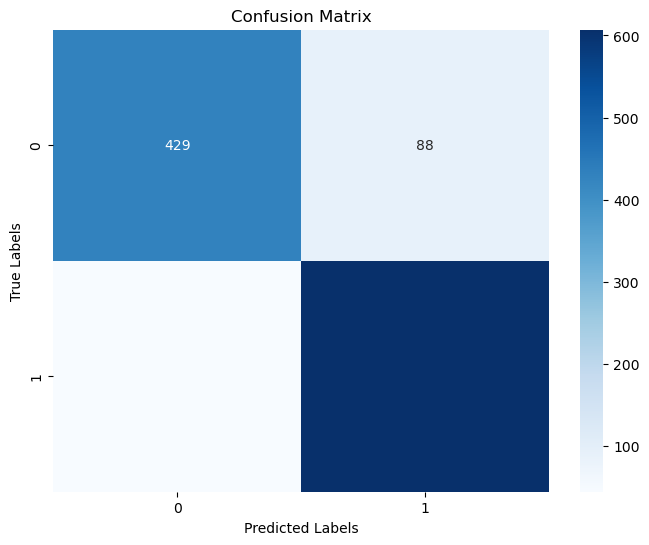

In [30]:
# Compute confusion matrix
conf_matrix = confusion_matrix(yr_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()